In [115]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [116]:
INPUT = '../data/01_raw/train_4competition.csv'
df_original = pd.read_csv(INPUT, parse_dates=['key', 'pickup_datetime'])
df_original

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.000000700,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.000000200,4.2,2009-03-24 20:46:20+00:00,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.000000400,14.1,2011-04-02 22:04:24+00:00,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.000000200,28.9,2011-10-26 05:57:51+00:00,-73.980901,40.764629,-73.870605,40.773963,1


In [117]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                datetime64[ns]     
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(1)
memory usage: 3.3 GB


In [118]:
df_original = df_original.rename(columns={'key': 'id'})
df_original['id'] = df_original['id'].astype('category')

In [119]:
df_original = df_original.sort_values(by='pickup_datetime')

In [120]:
df_original.head(20)

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
44194380,2009-01-01 00:00:27.000000100,30.20,2009-01-01 00:00:27+00:00,-73.782104,40.644881,-73.963565,40.676348,1
880228,2009-01-01 00:00:46.000000200,15.00,2009-01-01 00:00:46+00:00,-73.953738,40.806762,-73.989427,40.769542,1
13340185,2009-01-01 00:00:49.000000200,4.20,2009-01-01 00:00:49+00:00,-73.993185,40.727841,-73.990781,40.730007,1
661006,2009-01-01 00:01:04.000000100,5.80,2009-01-01 00:01:04+00:00,-73.995133,40.734111,-73.998232,40.722874,2
12913471,2009-01-01 00:01:04.000000300,14.60,2009-01-01 00:01:04+00:00,-73.972484,40.742743,-73.918937,40.764496,1
20622610,2009-01-01 00:01:26.000000100,6.10,2009-01-01 00:01:26+00:00,-73.985850,40.722826,-73.986301,40.739347,1
42925313,2009-01-01 00:01:31.000000100,23.80,2009-01-01 00:01:31+00:00,-73.972705,40.785866,-73.884344,40.866797,1
13483297,2009-01-01 00:01:34.000000100,4.20,2009-01-01 00:01:34+00:00,-73.988243,40.749692,-73.982899,40.751337,1
17653273,2009-01-01 00:01:56.000000300,11.40,2009-01-01 00:01:56+00:00,-73.983981,40.721738,-73.994987,40.750136,1
36922939,2009-01-01 00:01:56.000000100,160.00,2009-01-01 00:01:56+00:00,-73.943636,40.711730,-73.943638,40.711730,1


In [121]:
df_original.tail(20)

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
48815095,2015-06-30 23:58:39.000000600,6.00,2015-06-30 23:58:39+00:00,-73.984467,40.742828,-73.974571,40.756538,1
21379529,2015-06-30 23:58:44.000000100,16.00,2015-06-30 23:58:44+00:00,-73.959549,40.764343,-73.993073,40.730824,2
11070616,2015-06-30 23:58:58.000000400,16.50,2015-06-30 23:58:58+00:00,-73.984970,40.760277,-73.981880,40.721386,1
2203030,2015-06-30 23:59:03.000000400,11.00,2015-06-30 23:59:03+00:00,-73.969475,40.750282,-73.993965,40.751568,1
29252017,2015-06-30 23:59:09.000000700,6.50,2015-06-30 23:59:09+00:00,-73.986031,40.757202,-73.990425,40.739578,1
15239550,2015-06-30 23:59:13.000000100,10.50,2015-06-30 23:59:13+00:00,-74.002617,40.733818,-73.988991,40.758331,1
38906620,2015-06-30 23:59:14.000000700,21.54,2015-06-30 23:59:14+00:00,-73.991104,40.749706,-73.924500,40.743649,6
47565295,2015-06-30 23:59:23.000000100,19.00,2015-06-30 23:59:23+00:00,-73.993683,40.735870,-73.956268,40.726341,1
19260539,2015-06-30 23:59:25.000000100,14.50,2015-06-30 23:59:25+00:00,-73.985352,40.687199,-73.924423,40.690731,5
54223853,2015-06-30 23:59:26.000000300,8.50,2015-06-30 23:59:26+00:00,-73.985260,40.723671,-73.975899,40.746513,1


In [122]:
df_original.describe().round(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,55423856.00,55423856.00,55423856.00,55423480.00,55423480.00,55423856.00
mean,11.35,-72.51,39.92,-72.51,39.92,1.69
std,20.71,12.85,9.64,12.78,9.63,1.33
min,-300.00,-3442.06,-3492.26,-3442.02,-3547.89,0.00
25%,6.00,-73.99,40.73,-73.99,40.73,1.00
50%,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,12.50,-73.97,40.77,-73.96,40.77,2.00
max,93963.36,3457.63,3408.79,3457.62,3537.13,208.00


In [123]:
df_original.isnull().sum()

id                     0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [124]:
num_cols = df_original.select_dtypes(include=['number']).columns

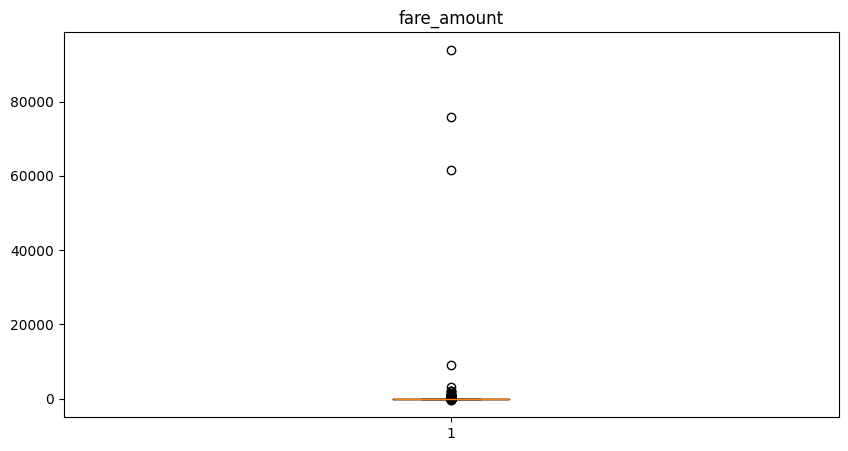

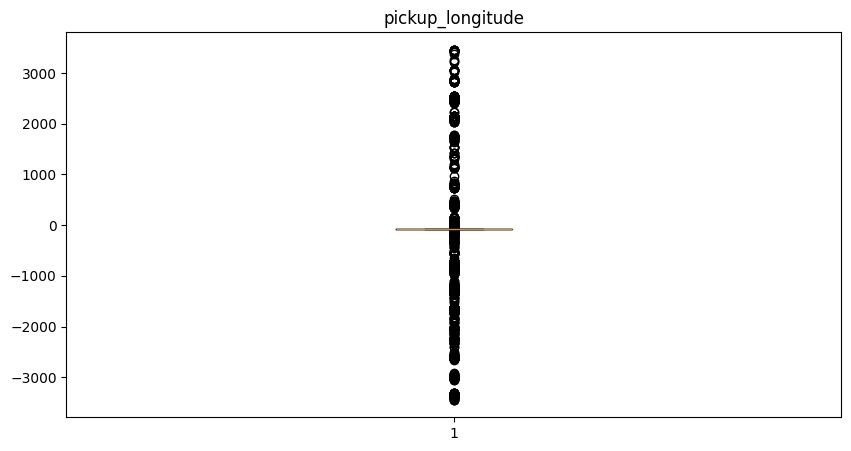

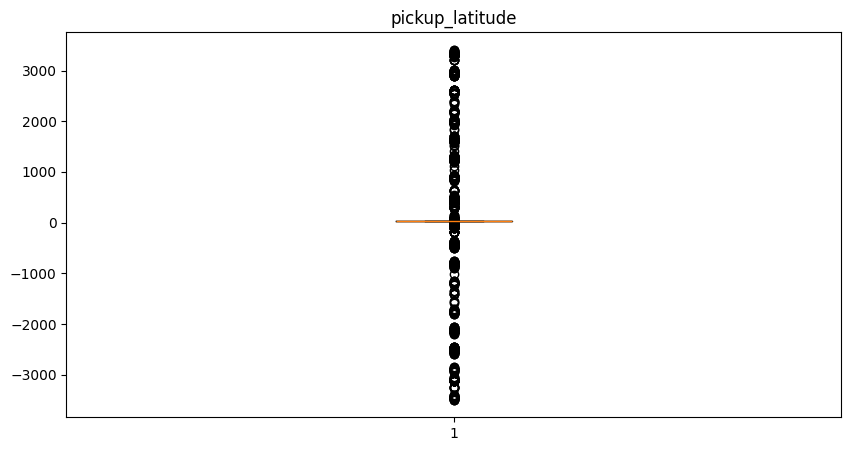

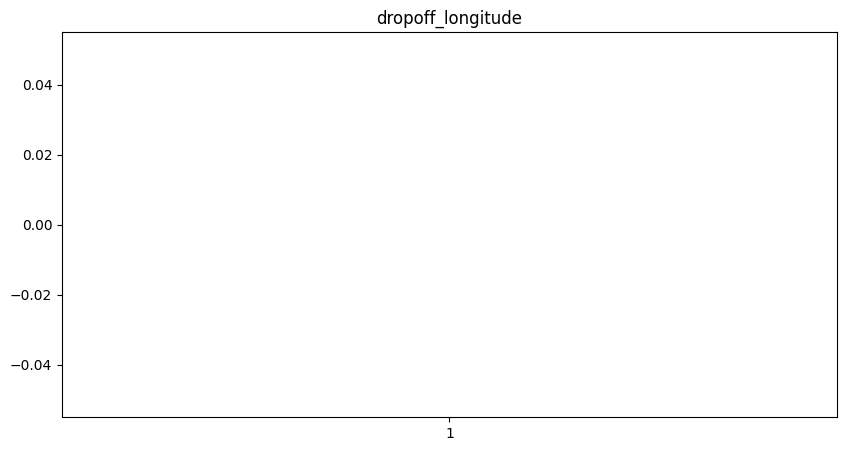

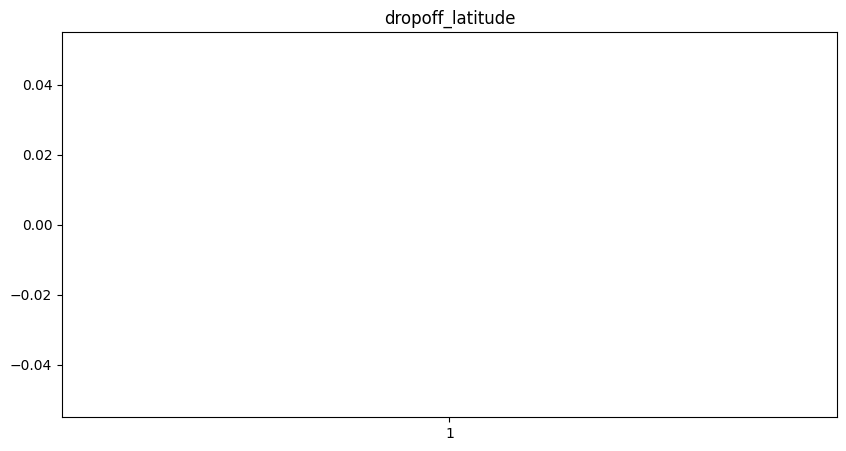

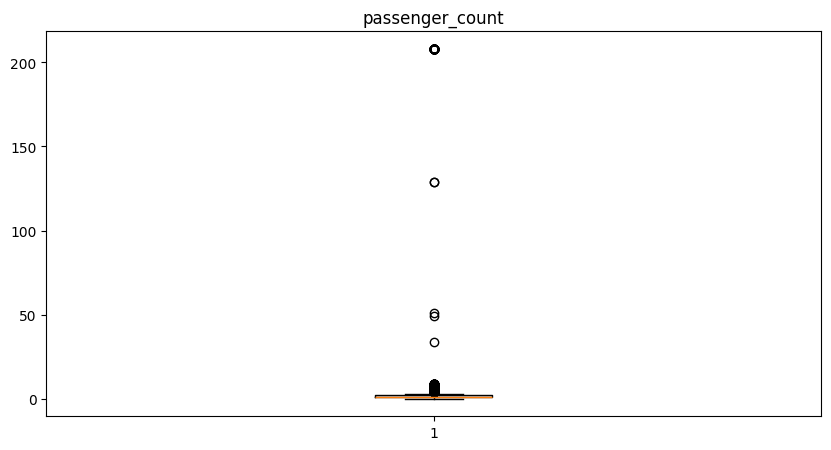

In [125]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_original[col])
    plt.title(col)
    plt.show()

### Cleaning

In [126]:
df = df_original.copy()

##### Amount

In [127]:
### The amount should be positive
df = df[df['fare_amount'] > 0]

In [128]:
df = df[df['fare_amount'] > 0]
df = df[df['fare_amount'] < 1000]

##### Coordinates - shouldn't be null, should be a NYC location - 

In [129]:
df = df.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], how='any')

In [130]:
#### The values of the longitude and latitude are not in the range of the world map
# The longitude should be between -180 and 180
# The latitude should be between -90 and 90
df = df[df['pickup_longitude'].between(-180, 180) & df['dropoff_longitude'].between(-180, 180) & df['pickup_latitude'].between(-90,90) & df['dropoff_latitude'].between(-90, 90)]

In [131]:
df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0) & (df['pickup_latitude'] != 0) & (df['dropoff_latitude'] != 0)]

In [132]:
df = df[(df['passenger_count'] <= 6) & (df['passenger_count'] > 0)]

In [133]:
df.describe().round(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,54122349.00,54122349.00,54122349.00,54122349.00,54122349.00,54122349.00
mean,11.33,-73.91,40.69,-73.91,40.69,1.69
std,9.70,2.71,2.58,2.70,2.58,1.31
min,0.01,-171.80,-77.83,-173.96,-74.35,1.00
25%,6.00,-73.99,40.74,-73.99,40.74,1.00
50%,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,12.50,-73.97,40.77,-73.97,40.77,2.00
max,978.00,169.97,89.53,169.97,89.82,6.00


In [134]:
df = df[df['pickup_longitude'].between(-75, -70) & df['dropoff_longitude'].between(-75, -70) & df['pickup_latitude'].between(35,45) & df['dropoff_latitude'].between(35, 45)]

In [135]:
df.shape

(54072573, 8)

In [136]:
df[df['fare_amount'] > 200]

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
19694304,2009-06-04 03:10:57.000000100,206.00,2009-06-04 03:10:57+00:00,-73.929476,40.811945,-73.929495,40.811929,1
34960585,2009-06-26 03:15:16.000000100,204.15,2009-06-26 03:15:16+00:00,-74.560112,40.778864,-74.560112,40.778864,1
3699603,2009-10-02 19:25:00.000000480,201.00,2009-10-02 19:25:00+00:00,-73.540610,41.054950,-73.540603,41.054903,1
44719896,2009-10-03 08:27:22.000000100,206.00,2009-10-03 08:27:22+00:00,-74.166772,41.085089,-74.166772,41.085089,1
3889236,2009-12-10 06:48:46.000000100,215.14,2009-12-10 06:48:46+00:00,-73.776496,40.645509,-74.461705,40.550163,2
...,...,...,...,...,...,...,...,...
2372662,2015-06-28 12:56:39.000000400,209.00,2015-06-28 12:56:39+00:00,-73.550125,41.043587,-73.550171,41.043579,2
33589237,2015-06-28 17:20:28.000000100,214.54,2015-06-28 17:20:28+00:00,-73.809677,40.690556,-73.535103,41.051086,1
8640489,2015-06-29 05:59:54.000000100,220.00,2015-06-29 05:59:54+00:00,-73.790260,40.646812,-73.790260,40.646812,2
30890856,2015-06-29 15:04:46.000000200,236.04,2015-06-29 15:04:46+00:00,-73.788445,40.644981,-74.432877,40.554932,1


### Boxplots after cleaning

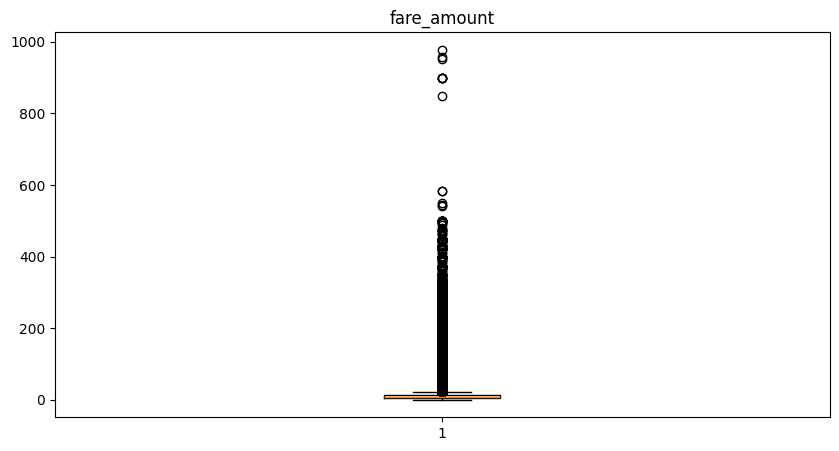

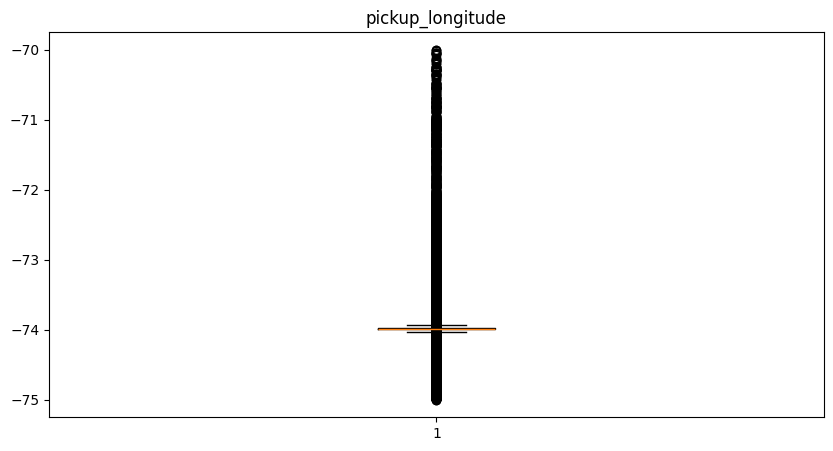

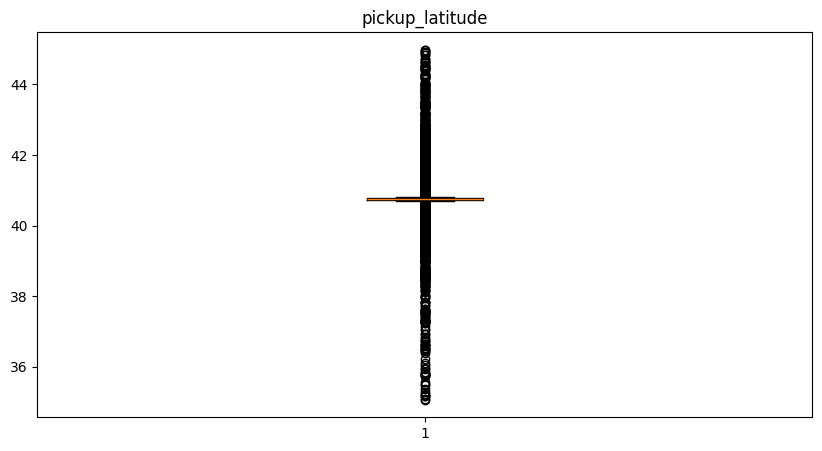

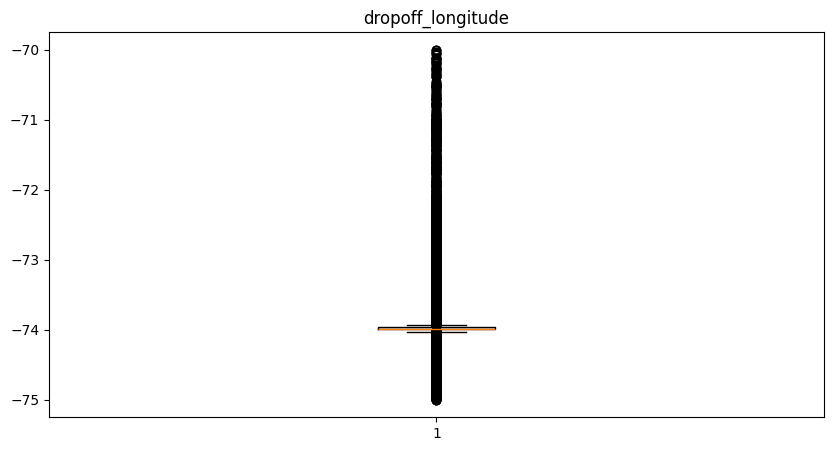

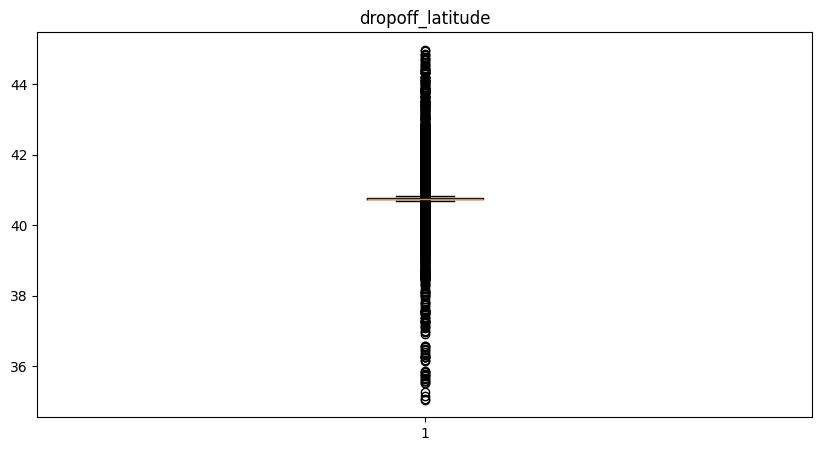

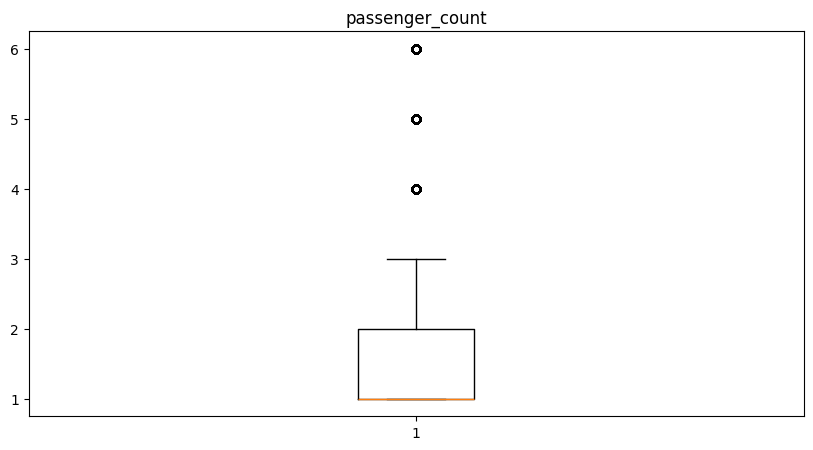

In [137]:
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

### Feature engineering

In [ ]:
def split_date_cols(df, date_col):  
    df[date_col] = pd.to_datetime(df[date_col])
    df[f"{date_col}_dayofyear"] = df[date_col].dt.dayofyear
    df[f"{date_col}_month"] = df[date_col].dt.month
    df[f"{date_col}_year"] = df[date_col].dt.year
    df[f"{date_col}_hour"] = df[date_col].dt.hour
    df[f"{date_col}_dayofweek"] = df[date_col].dt.dayofweek
    df[f"{date_col}_is_weekend"] = df[date_col].dt.dayofweek >= 5

    df[f"{date_col}_is_late_night"] = df[f"{date_col}_hour"].between(22, 23) # 22:00 to 23:59
    df[f"{date_col}_is_night"] = df[f"{date_col}_hour"].between(0, 3)  # 00:00 to 03:59
    df[f"{date_col}_is_early_morning"] = df[f"{date_col}_hour"].between(4, 6) # 04:00 to 06:59
    df[f"{date_col}_is_rush_hour"] =  df[f"{date_col}_hour"].between(7, 8) | df[f"{date_col}_hour"].between(16, 18)
    # Drop unnecessary columns
    # df.drop(columns=[date_col], inplace=True)
    return df

In [139]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Distance in kilometers

In [140]:
df = split_date_cols(df, 'pickup_datetime')

In [141]:
df['trip_distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                                 df['dropoff_latitude'], df['dropoff_longitude'])

In [142]:
df[df['trip_distance'] < 100]

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_dayofyear,pickup_datetime_month,pickup_datetime_year,pickup_datetime_hour,pickup_datetime_dayofweek,pickup_datetime_is_weekend,is_late_night,is_night,is_early_morning,is_rush_hour,trip_distance
44194380,2009-01-01 00:00:27.000000100,30.2,2009-01-01 00:00:27+00:00,-73.782104,40.644881,-73.963565,40.676348,1,1,1,2009,0,3,False,False,True,False,False,15.701159
880228,2009-01-01 00:00:46.000000200,15.0,2009-01-01 00:00:46+00:00,-73.953738,40.806762,-73.989427,40.769542,1,1,1,2009,0,3,False,False,True,False,False,5.114331
13340185,2009-01-01 00:00:49.000000200,4.2,2009-01-01 00:00:49+00:00,-73.993185,40.727841,-73.990781,40.730007,1,1,1,2009,0,3,False,False,True,False,False,0.314711
661006,2009-01-01 00:01:04.000000100,5.8,2009-01-01 00:01:04+00:00,-73.995133,40.734111,-73.998232,40.722874,2,1,1,2009,0,3,False,False,True,False,False,1.276494
12913471,2009-01-01 00:01:04.000000300,14.6,2009-01-01 00:01:04+00:00,-73.972484,40.742743,-73.918937,40.764496,1,1,1,2009,0,3,False,False,True,False,False,5.118060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41030757,2015-06-30 23:59:46.000000100,24.5,2015-06-30 23:59:46+00:00,-73.987198,40.739059,-73.962769,40.672539,2,181,6,2015,23,1,False,True,False,False,False,7.678055
49938742,2015-06-30 23:59:48.000000300,33.5,2015-06-30 23:59:48+00:00,-73.970360,40.783756,-73.870560,40.709118,1,181,6,2015,23,1,False,True,False,False,False,11.813707
14242297,2015-06-30 23:59:48.000000200,6.0,2015-06-30 23:59:48+00:00,-73.978867,40.750820,-73.989326,40.740780,2,181,6,2015,23,1,False,True,False,False,False,1.422278
22749696,2015-06-30 23:59:52.000000100,9.5,2015-06-30 23:59:52+00:00,-73.944077,40.711658,-73.982857,40.719799,1,181,6,2015,23,1,False,True,False,False,False,3.391457


### Further cleaning - based on engineered features

In [143]:
df = df[(df['trip_distance'] < 50) & (df['trip_distance'] > 0.5)]

In [144]:
df['pickup_datetime_year'].value_counts()

pickup_datetime_year
2012    8264218
2013    8167308
2011    8125385
2009    8021031
2010    7794287
2014    7788342
2015    3651415
Name: count, dtype: int64

### Limiting to years 2013, 2014, 2015

In [145]:
df = df[(df['pickup_datetime_year'] == 2013) | (df['pickup_datetime_year'] == 2014) | (df['pickup_datetime_year'] == 2015)]

In [146]:
df['pickup_datetime_year'].value_counts(normalize=True)

pickup_datetime_year
2013    0.416549
2014    0.397221
2015    0.186230
Name: proportion, dtype: float64

In [147]:
df.describe().round(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_dayofyear,pickup_datetime_month,pickup_datetime_year,pickup_datetime_hour,pickup_datetime_dayofweek,trip_distance
count,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00,19607065.00
mean,12.94,-73.98,40.75,-73.97,40.75,1.70,163.44,5.89,2013.77,13.53,3.05,3.52
std,10.76,0.04,0.03,0.03,0.03,1.36,103.54,3.39,0.74,6.53,1.96,3.75
min,0.01,-74.97,36.74,-74.95,36.56,1.00,1.00,1.00,2013.00,0.00,0.00,0.50
25%,7.00,-73.99,40.74,-73.99,40.74,1.00,75.00,3.00,2013.00,9.00,1.00,1.35
50%,9.50,-73.98,40.75,-73.98,40.75,1.00,149.00,5.00,2014.00,14.00,3.00,2.25
75%,14.50,-73.97,40.77,-73.96,40.77,2.00,253.00,9.00,2014.00,19.00,5.00,4.07
max,952.00,-70.05,44.30,-70.18,44.31,6.00,365.00,12.00,2015.00,23.00,6.00,49.98


In [148]:
df.columns

Index(['id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_datetime_dayofyear', 'pickup_datetime_month',
       'pickup_datetime_year', 'pickup_datetime_hour',
       'pickup_datetime_dayofweek', 'pickup_datetime_is_weekend',
       'is_late_night', 'is_night', 'is_early_morning', 'is_rush_hour',
       'trip_distance'],
      dtype='object')

In [149]:
df[df['fare_amount'] > 300]

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_dayofyear,pickup_datetime_month,pickup_datetime_year,pickup_datetime_hour,pickup_datetime_dayofweek,pickup_datetime_is_weekend,is_late_night,is_night,is_early_morning,is_rush_hour,trip_distance
7009310,2013-03-07 23:34:32.000000300,500.00,2013-03-07 23:34:32+00:00,-73.900865,40.725692,-73.669810,40.692113,3,66,3,2013,23,3,False,True,False,False,False,19.830178
52483168,2013-03-14 16:30:00.000000620,350.00,2013-03-14 16:30:00+00:00,-74.226737,40.645635,-74.130440,40.731697,1,73,3,2013,16,3,False,False,False,False,True,12.549944
20714163,2013-03-16 23:23:00.000000520,400.00,2013-03-16 23:23:00+00:00,-74.061397,40.706600,-74.403707,40.480160,4,75,3,2013,23,5,True,True,False,False,False,38.332312
51106562,2013-08-01 03:31:44.000000200,544.44,2013-08-01 03:31:44+00:00,-73.950263,40.755101,-73.940435,40.750783,1,213,8,2013,3,3,False,False,True,False,False,0.957009
40567207,2013-08-27 10:34:33.000000200,333.00,2013-08-27 10:34:33+00:00,-74.013860,40.715497,-74.015687,40.708033,2,239,8,2013,10,1,False,False,False,False,False,0.844124
42650634,2013-09-26 01:35:57.000000100,328.00,2013-09-26 01:35:57+00:00,-74.882924,40.640587,-74.888105,40.634555,1,269,9,2013,1,3,False,False,True,False,False,0.800621
30348039,2014-03-15 09:39:00.000000140,420.00,2014-03-15 09:39:00+00:00,-73.782137,40.644655,-73.792965,40.662900,1,74,3,2014,9,5,True,False,False,False,False,2.224906
14723124,2014-06-03 13:30:12.000000600,395.00,2014-06-03 13:30:12+00:00,-73.921172,40.803800,-73.878127,40.874199,1,154,6,2014,13,1,False,False,False,False,False,8.624988
34459229,2014-09-18 23:33:00.000000380,305.00,2014-09-18 23:33:00+00:00,-73.994865,40.734375,-74.039857,40.731297,1,261,9,2014,23,3,False,True,False,False,False,3.806405
42888812,2014-10-03 03:30:37.000000100,375.00,2014-10-03 03:30:37+00:00,-73.870964,40.727686,-73.866318,40.721333,3,276,10,2014,3,4,False,False,True,False,False,0.807661


In [150]:
df[df['trip_distance'] > 20]['fare_amount']

27388577    52.00
278430      56.80
9975150     56.80
6232632     64.60
15119274    56.80
            ...  
13107841    57.54
16005767    57.54
43366160    57.54
23587131    57.54
9489697     57.54
Name: fare_amount, Length: 280869, dtype: float64

In [151]:
df.shape

(19607065, 19)

### Correlations

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607065 entries, 34430871 to 9271269
Data columns (total 19 columns):
 #   Column                      Dtype              
---  ------                      -----              
 0   id                          category           
 1   fare_amount                 float64            
 2   pickup_datetime             datetime64[ns, UTC]
 3   pickup_longitude            float64            
 4   pickup_latitude             float64            
 5   dropoff_longitude           float64            
 6   dropoff_latitude            float64            
 7   passenger_count             int64              
 8   pickup_datetime_dayofyear   int32              
 9   pickup_datetime_month       int32              
 10  pickup_datetime_year        int32              
 11  pickup_datetime_hour        int32              
 12  pickup_datetime_dayofweek   int32              
 13  pickup_datetime_is_weekend  bool               
 14  is_late_night               boo

In [152]:
num_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'trip_distance']

<Axes: >

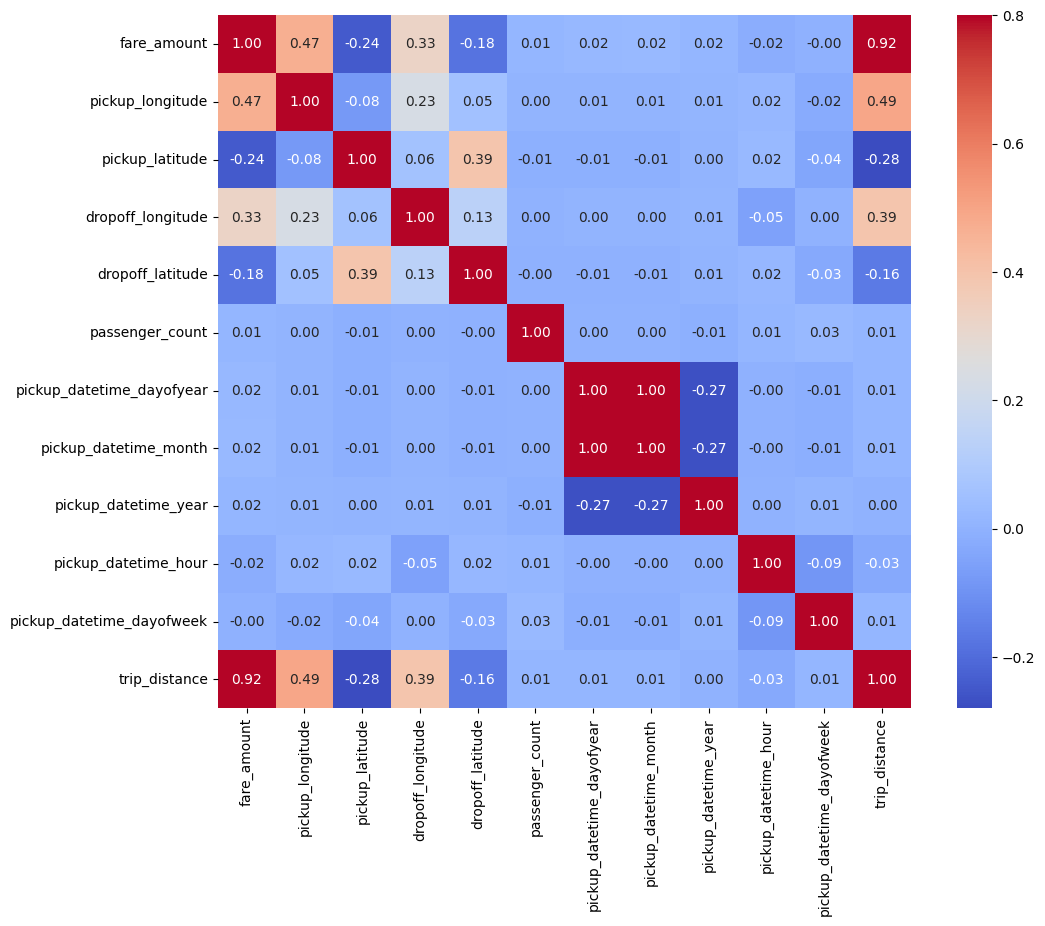

In [153]:
corrmat = df.select_dtypes(include="number").corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="coolwarm",  annot=True, fmt=".2f", annot_kws={"size": 10})

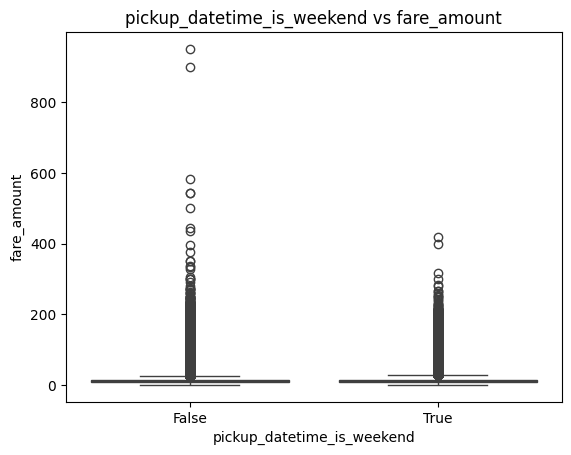

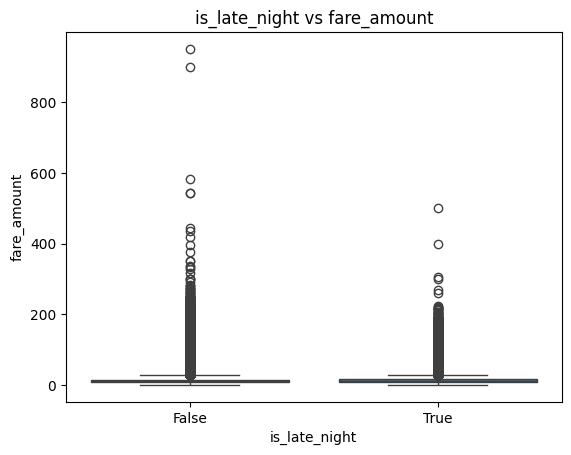

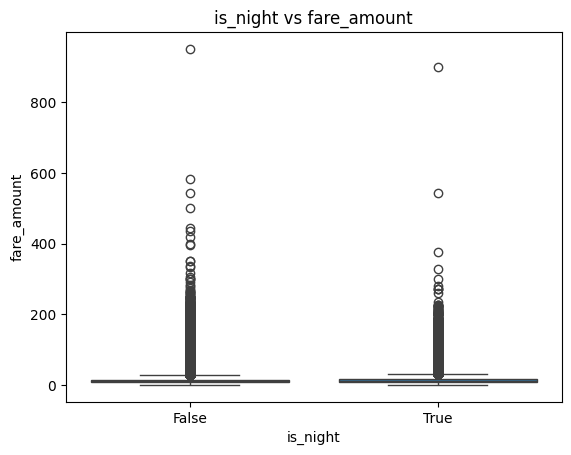

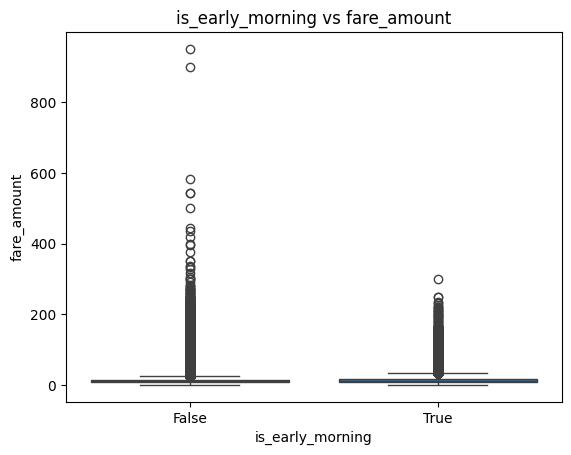

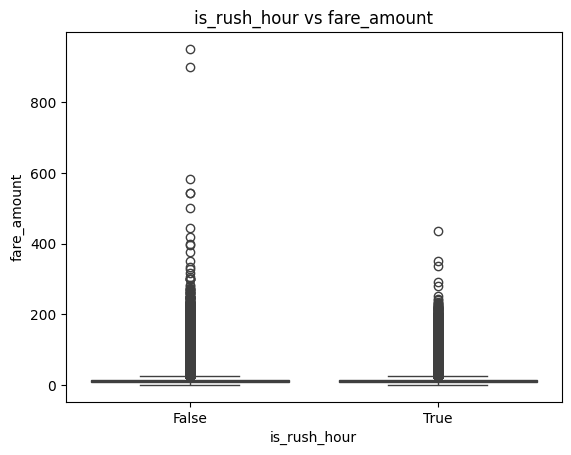

In [158]:
bool_cols = df.select_dtypes(include=bool).columns
target = "fare_amount"

for col in bool_cols:
    sns.boxplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

### Exporting the cleaned, reduced dataset

In [154]:
df.to_csv('../data/02_processed/df_cleaned.csv', index=False)